In [12]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys
from packaging import version
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from pathlib import Path
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_openml

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 



In [13]:
mm_conflicts = pd.read_csv('mm_conflicts_merged.csv')


In [14]:
mm_conflicts.head()

,Year,Country,Mortality Rate,At War
0,2003,Samoa,32.79250,0
1,2019,Montenegro,2.91447,0
2,2020,Montenegro,3.05016,0
3,2005,Oman,17.57624,0
4,1993,Guinea-Bissau,928.64729,0


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(mm_conflicts[['Mortality Rate', 'At War']])

# Define the parameter grid for KMeans
param_grid_kmeans = {'n_clusters': [2, 3, 4, 5, 6, 7, 8]}

# Perform grid search to find the best number of clusters
# Use a custom scoring function for silhouette score
def silhouette_scorer(estimator, X):
	cluster_labels = estimator.fit_predict(X)
	return silhouette_score(X, cluster_labels)

grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, scoring=silhouette_scorer, cv=5, n_jobs=-1)
grid_search_kmeans.fit(scaled_features)

# Get the best KMeans model
best_kmeans = grid_search_kmeans.best_estimator_

# Predict cluster labels
kmeans_labels = best_kmeans.predict(scaled_features)

# Evaluate the clustering performance
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Best number of clusters: {grid_search_kmeans.best_params_['n_clusters']}")
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}")

Best number of clusters: 4
Silhouette Score for KMeans: 0.7614636537023033


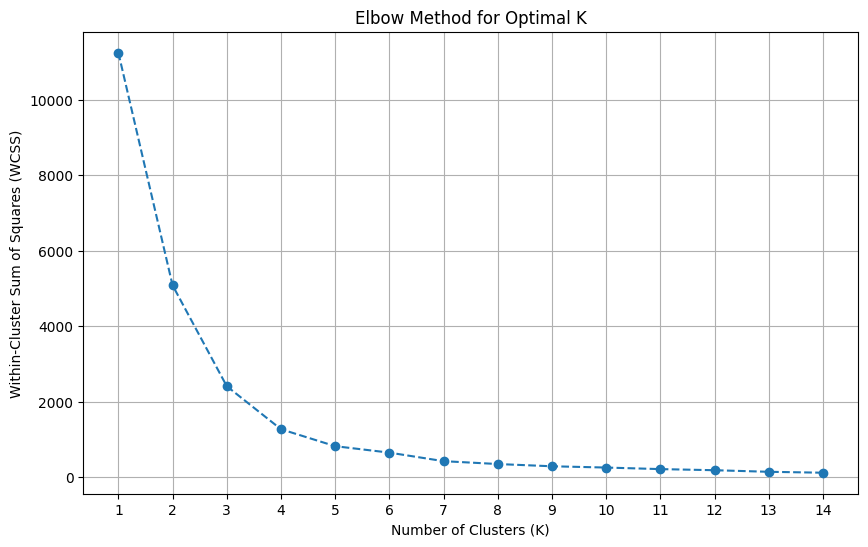

In [16]:
wcss = []
k_values = range(1, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid()
plt.show()

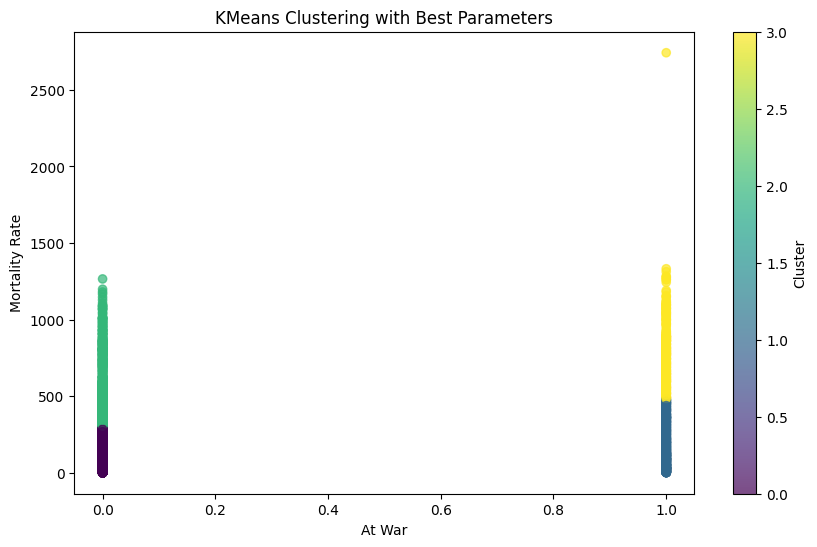

Silhouette Score for KMeans: 0.7614636537023033


In [17]:
# Visualize the KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['At War'], mm_conflicts['Mortality Rate'], c=kmeans_labels, cmap='viridis', alpha=0.7)    
plt.colorbar(label='Cluster')
plt.xlabel('At War')        
plt.ylabel('Mortality Rate')
plt.title('KMeans Clustering with Best Parameters')
plt.show()
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}") 

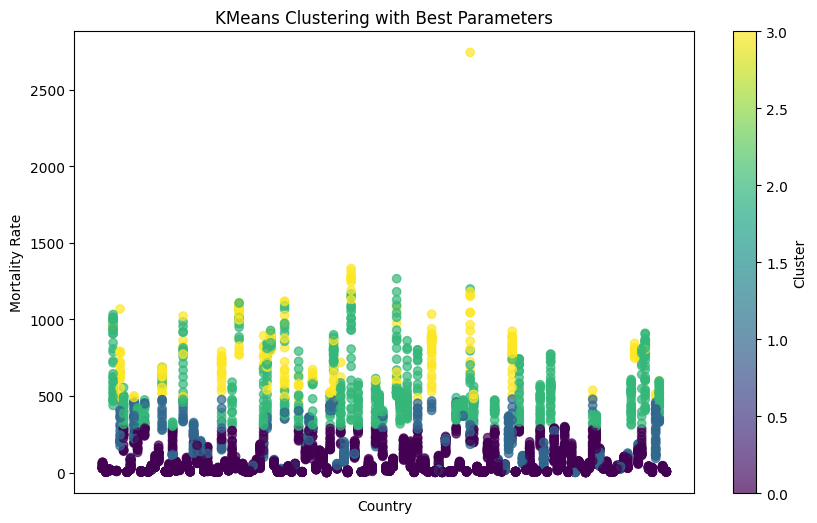

Silhouette Score for KMeans: 0.7614636537023033


In [18]:
# Visualize the KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(mm_conflicts['Country'], mm_conflicts['Mortality Rate'], c=kmeans_labels, cmap='viridis', alpha=0.7)    
plt.colorbar(label='Cluster')
plt.xlabel('Country')
plt.xticks([])     
plt.ylabel('Mortality Rate')
plt.title('KMeans Clustering with Best Parameters')
plt.show()
silhouette_avg_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_avg_kmeans}") 